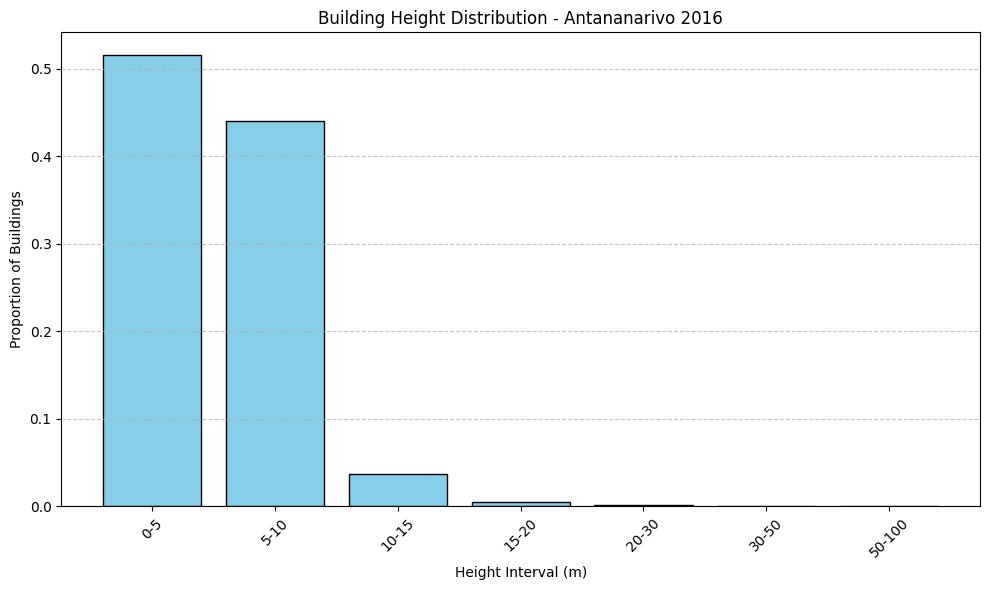

  height_interval_m   count  proportion
0               0-5  597107    0.515833
1              5-10  509245    0.439930
2             10-15   43398    0.037491
3             15-20    5652    0.004883
4             20-30    1746    0.001508
5             30-50     355    0.000307
6            50-100      55    0.000048


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_height_distribution(df, city_name='', bins=None):
    """
    绘制建筑高度分布直方图和比例条形图
    df: 包含 'avg_height' 列的 DataFrame
    city_name: 图表标题使用
    bins: 高度分箱边界列表
    """
    if bins is None:
        bins = [0, 5, 10, 15, 20, 30, 50, 100]

    df_nz = df[df['avg_height'] > 0]
    counts, edges = np.histogram(df_nz['avg_height'], bins=bins)
    prop = counts / counts.sum()

    intervals = [f"{edges[i]}-{edges[i+1]}" for i in range(len(edges)-1)]

    # 绘制条形图
    plt.figure(figsize=(10,6))
    plt.bar(intervals, prop, color='skyblue', edgecolor='black')
    plt.ylabel('Proportion of Buildings')
    plt.xlabel('Height Interval (m)')
    plt.title(f'Building Height Distribution - {city_name}')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # 可选返回数据
    dist_df = pd.DataFrame({
        'height_interval_m': intervals,
        'count': counts,
        'proportion': prop
    })
    return dist_df

# 使用示例
df_city = pd.read_csv("aggregated_data/Antananarivo_2016_3x3_windows.csv")
dist_df = plot_height_distribution(df_city, city_name='Antananarivo 2016')
print(dist_df)

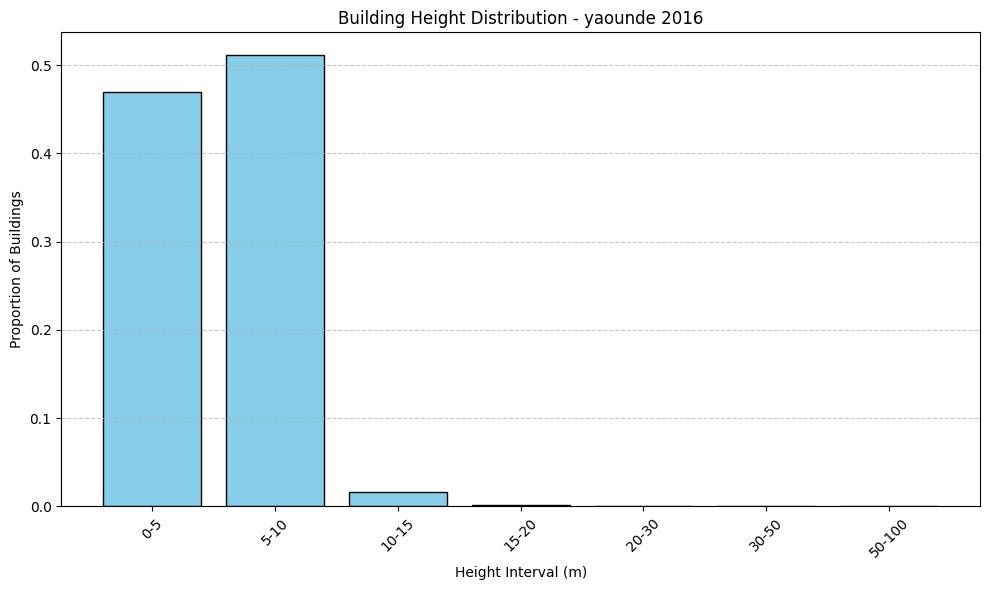

  height_interval_m   count  proportion
0               0-5  792602    0.469302
1              5-10  863909    0.511523
2             10-15   28385    0.016807
3             15-20    2755    0.001631
4             20-30     935    0.000554
5             30-50     252    0.000149
6            50-100      59    0.000035


In [18]:
df_city = pd.read_csv("aggregated_data/Yaounde_2016_3x3_windows.csv")
dist_df = plot_height_distribution(df_city, city_name='yaounde 2016')
print(dist_df)

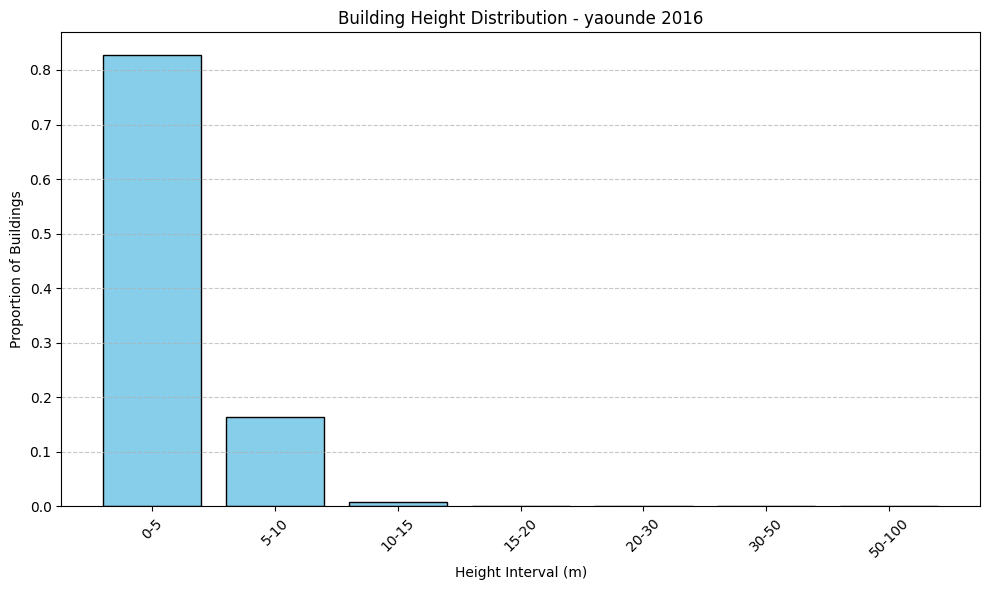

  height_interval_m    count  proportion
0               0-5  1395397    0.827587
1              5-10   275427    0.163351
2             10-15    13255    0.007861
3             15-20     1406    0.000834
4             20-30      472    0.000280
5             30-50      122    0.000072
6            50-100       24    0.000014


In [22]:
df_city = pd.read_csv("pixel_data/Yaounde_2016_all_pixels_confidence.csv")
df_city.head()
df_city['avg_height'] = df_city['building_height']
dist_df = plot_height_distribution(df_city, city_name='yaounde 2016')
print(dist_df)

In [2]:
import pandas as pd


df = pd.read_csv("CitiesDB_new.csv")

# Mark coastal cities manually (based on known geography)
coastal_cities = {
    "Abidjan", "Buenos Aires", "Cairo", "Luanda", "Alexandria", "Dar es Salaam", "Accra", "Algiers",
    "Cape Town", "Dakar", "Maputo", "Conakry", "Freetown", "Mombasa", "Monrovia", "Nouakchott",
    "Oran", "Libreville", "Jakarta", "Mumbai", "Manila", "Kolkata", "Karachi", "Ho Chi Minh City",
    "Chennai", "Kuala Lumpur", "Surat", "Surabaya", "Denpasar", "Davao", "Semarang", "Palembang",
    "Makassar", "Batam", "Bandar Lampung", "Rio de Janeiro", "Lima", "Salvador", "Guayaquil",
    "Santo Domingo", "Port-au-Prince", "Cancun", "Acapulco"
}

df["Coastal"] = df["City"].apply(lambda x: 1 if x in coastal_cities else 0)

In [5]:
df.to_csv("CitiesDB_new1.csv", index=False)